<a href="https://colab.research.google.com/github/dipu-k/Machine-Learning/blob/main/Credit_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
# df.drop('Unnamed: 0', axis=1, inplace=True) # Removed this line


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load Dataset
# url = "https://raw.githubusercontent.com/ArashVahabpour/German-Credit-Data/master/german_credit_data.csv"
df = pd.read_csv("/content/german_credit_data.csv")

In [5]:
# Preview
print(df.head())

                             CustomerID CheckingStatus  LoanDuration  \
0  713a336c-a255-4e2d-9d57-90b3e99e2f06       0_to_200            31   
1  140b363f-a3fe-4828-a33f-7284dfdb3969         less_0            18   
2  43b7b51d-5eda-4860-b461-ebef3d3436f4         less_0            15   
3  f40eaf08-e6d1-4765-ab20-c5f7faca1635       0_to_200            28   
4  1728910a-d3ff-4799-ac50-203a3a58a3fb    no_checking            28   

            CreditHistory LoanPurpose  LoanAmount ExistingSavings  \
0    credits_paid_to_date       other        1889      100_to_500   
1    credits_paid_to_date     car_new         462        less_100   
2  prior_payments_delayed   furniture         250        less_100   
3    credits_paid_to_date  retraining        3693        less_100   
4  prior_payments_delayed   education        6235     500_to_1000   

  EmploymentDuration  InstallmentPercent     Sex  ...       OwnsProperty  Age  \
0             less_1                   3  female  ...  savings_insuranc

In [ ]:
print(df.columns)


Index(['CustomerID', 'CheckingStatus', 'LoanDuration', 'CreditHistory',
       'LoanPurpose', 'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')


In [ ]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
# Label encoding for categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Features and Target
X = df.drop('Risk', axis=1)
y = df['Risk']  # 1=good, 0=bad

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       665
           1       0.71      0.59      0.65       335

    accuracy                           0.78      1000
   macro avg       0.76      0.74      0.74      1000
weighted avg       0.78      0.78      0.78      1000

Confusion Matrix:
[[585  80]
 [137 198]]
ROC AUC Score: 0.8241

Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       665
           1       0.59      0.60      0.59       335

    accuracy                           0.72      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.73      0.72      0.72      1000

Confusion Matrix:
[[522 143]
 [133 202]]
ROC AUC Score: 0.6940

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84  

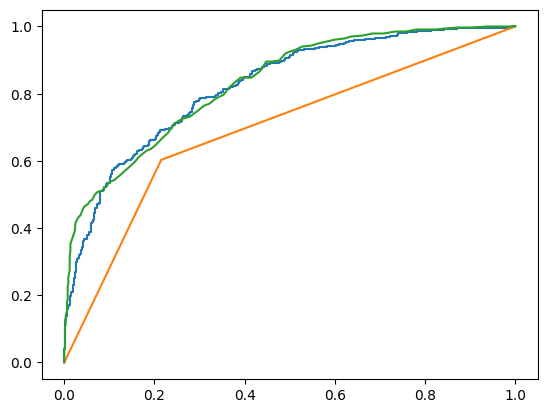

In [ ]:
# Train and evaluate
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC AUC
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, probs)
        print(f"ROC AUC Score: {auc:.4f}")

        fpr, tpr, _ = roc_curve(y_test, probs)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


/tmp/ipython-input-26-2365122258.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


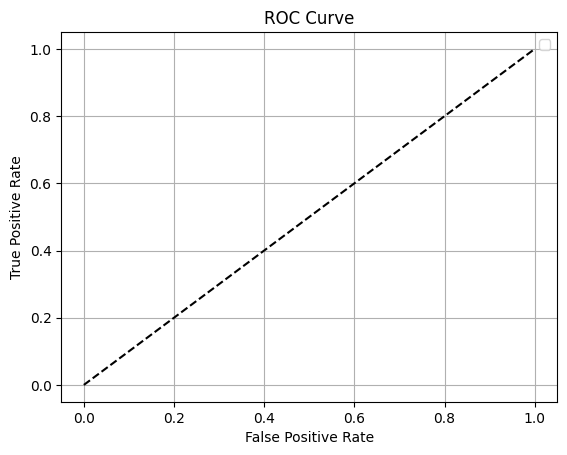

In [ ]:
# ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()